# Linear Regression

The expression $ \widehat{y} = w^T x + b $ represents a linear model commonly used in machine learning and regression tasks. Here's how each component fits into this equation:

- $ x $: This is an input vector of independent variables (a d-dimensional feature vector). This vector is connected to $ y $, which is the scalar output. One way to model this is by projecting $ x $ onto the weight vector $ w $. The bias term $ b $ is also included to account for any offset.

The main value of the output is $ y $, and the error is defined as $ e = y - \widehat{y} $. To optimize the model, we minimize the expectation of the loss function. As we iterate over the data, we focus on regression where the data is modeled with pairs $(\mathbf{x}, y)$. This state, known as supervised learning, includes the feature vector $ x $ and the desired output value $ y $. 

The expression $ \widehat{y} = w^T x + b $ represents a linear model commonly used in machine learning and regression tasks. Here's how each component fits into this equation:

$ x $: This is an input vector of independent variables (a d-dimensional feature vector). This vector is connected to $ y $, which is the scalar output. One way to model this is by projecting $ x $ onto the weight vector $ w $. Of course, this requires the bias term $ b $.
main value of output is $ y $ and error is $ e=y-\widehat{y} $ we again encountered by minimization of expection of loss function. Also, again index of data iterate. in regression we model data with two tuple $ (\textbf{x},y) $. this state name supervised data include feature vector of $ x $ and desired value of $ y $. This time linear model describe data $ D=\{\textbf{x}_i,y_i; i=1,\cdots ,n \} $
again review of all of work in pattern recognition, we try model data with linear or non-linear form over data unsupervised or supervised form. emphaziz of this book is over cost function. with minimizing of cost function desirable model is discovered. Solution method also needs for solving minimization to form of online or offline. 

## Loss function of regression
is the same as that used in clustering.  For more information about loss functions, see the [Loss function in clustering](../Clustering/Clustering_1.ipynb) section, specifically the Introduction of Loss Functions part.

Here is a simple example to better understand regression.


In [ ]:
import pandas as pd
data = {
    "age": [ 21,18,20,19,19,20,21,22,18,22 ],
    "tall": [ 174,168,170,171,175,180,173,170,165,184 ],
    "shoeSize": [ 44,41,42,42,43.5,45,43,44,41,46 ],
}
df = pd.DataFrame(data)
print(df)

   age  tall  shoeSize
0   21   174      44.0
1   18   168      41.0
2   20   170      42.0
3   19   171      42.0
4   19   175      43.5
5   20   180      45.0
6   21   173      43.0
7   22   170      44.0
8   18   165      41.0
9   22   184      46.0


Now, we will explore the relationship between height and age. Before doing so, let's plot it.

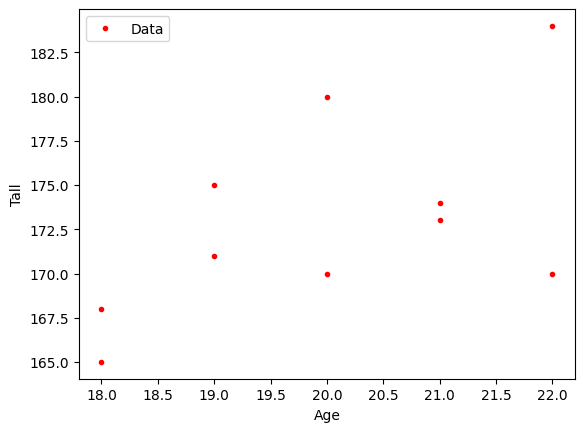

In [ ]:
import matplotlib.pyplot as plt
y = df['tall'].values
x = df['age'].values
plt.plot(x, y, '.r')
plt.xlabel('Age')
plt.ylabel('Tall')
plt.legend(['Data'], loc='best')
plt.show()

If we try fitting the linear model introduced in Linear Regression use the following code:

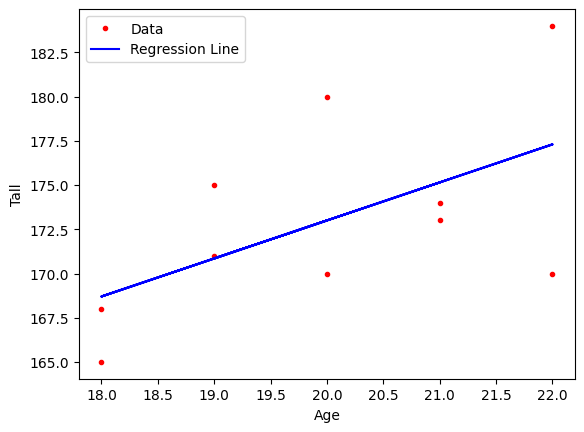

Slope (Coefficient): 2.1499999999999995
Intercept: 130.0


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = x.reshape(-1, 1)
model.fit(x, y)

# Get the regression line
y_pred = model.predict(x)

# Plot the data points
plt.plot(x, y, '.r')
plt.plot(x, y_pred, '-b')
plt.xlabel('Age')
plt.ylabel('Tall')
plt.legend(['Data', 'Regression Line'], loc='best')
plt.show()
# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

In the above example, the equation $ \hat{y} = w_1 \cdot x + w_0 $ represents a linear model. Here, $ w_1 $ represents the slope, and $ w_0 $ represents the intercept.

## Cost Function for regression
ُimilar to previous cost function,the cost function is given by: 

$$
\text{E}\left\{l\left( e \right)  \right\}+\lambda*Reularization Term
$$

where $ e $ define as,

$$
e=y-\hat{y}
$$

And as shown in the following figure, I need to include additional code here.

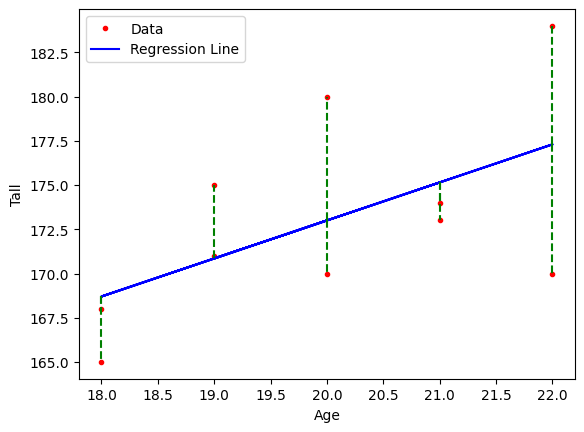

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()

data = {
    "age": [ 21,18,20,19,19,20,21,22,18,22 ],
    "tall": [ 174,168,170,171,175,180,173,170,165,184 ],
    "shoeSize": [ 44,41,42,42,43.5,45,43,44,41,46 ],
}
df = pd.DataFrame(data)
y = df['tall'].values
x = df['age'].values

x = x.reshape(-1, 1)
model.fit(x, y)

# Get the regression line
y_pred = model.predict(x)

# Plot the data points
plt.plot(x, y, '.r')
plt.plot(x, y_pred, '-b')
plt.xlabel('Age')
plt.ylabel('Tall')
plt.legend(['Data', 'Regression Line'], loc='best')

# Plot residuals as vertical lines
for i in range(len(x)):
    plt.vlines(x[i], y_pred[i], y[i], colors='g', linestyles='dashed')

plt.show()

Each sample shows an error between the model and the main value in the dataset. These errors affect the parameters $ w $ and $ b $ in the equation $ \hat{y}=w^{T}x+b $.

The error for each sample can be expressed as $ e_1 = y_1 - \hat{y}_1 $, and similarly, $ e_n = y_n - \hat{y}_n $. 

With a square loss function, the loss $ J(w, b) $ is given by:

$$ 
J(w, b) = \sum_{i=1}^{n} e_i^2 
$$

or equivalently,

$$
J(w, b) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 
$$

Notes: Samples with age 22 and height 184, and age 20 and height 180 generate large errors. These cause a significant impact on the parameters $ w $ and $ b $.

To correct this, we can follow two approaches: 
1. Introduce a regularization term.
2. Change the loss function.

## 1-Introduce a regularization term
### Ridge Regression (L2 Regularization)

In Ridge regression, we add a regularization term to the standard linear regression cost function. The cost function for Ridge regression is:

$$
J(w) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{d} w_j^2
$$

Where:
- $ n $ is the number of training examples.
- $ y_i $ is the actual value of the target variable for the $ i $-th example.
- $ \hat{y_i} $ is the predicted value of the target variable for the $ i $-th example.
- $ d $ is the number of features (or coefficients).
- $ w_j $ is the $ j $-th coefficient (or weight) in the model.
- $ \lambda $ is the regularization parameter that controls the strength of the regularization. It's a non-negative value, typically chosen using cross-validation.

The term $ \lambda \sum_{j=1}^{d} w_j^2 $ is the regularization term added to the mean squared error (MSE) loss function $ \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $. This term penalizes large values of $ w_j $, effectively shrinking them towards zero. The larger the value of $ \lambda $, the stronger the regularization effect.

### Lasso Regression (L1 Regularization)

In Lasso regression, the regularization term is different. The cost function for Lasso regression is:

$$
J(w) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{d} |w_j|
$$

regularization.

In Lasso regression, $ \lambda \sum_{j=1}^{d} |w_j| $ is the regularization term. Unlike Ridge regression, Lasso can lead some coefficients $ w_j $ to be exactly zero, effectively performing feature selection.

## Effect of Regularization 
in **Ridge Regression (L2 Regularization)** the goal is to minimize the following objective function:

$$
\min_{w} \left[ (Y - Xw)^T(Y - Xw) + \lambda ||w||_2^2 \right]
$$

Where:
- $ Y $ is the vector of observed values.
- $ X $ is the matrix of input features.
- $ w $ is the vector of coefficients.
- $ \lambda $ is the regularization parameter controlling the strength of the penalty.
- $ ||w||_2^2 = w^T w $ is the squared L2 norm of the coefficient vector.

### Derivation of the Closed-Form Solution

To find the closed-form solution for $ w $, we take the derivative of the objective function with respect to $ w $ and set it to zero.

1. **Objective Function**:

$$
J(w) = (Y - Xw)^T(Y - Xw) + \lambda w^T w
$$

2. **Gradient of $ J(w) $**:

$$
\frac{\partial J(w)}{\partial w} = -2X^T(Y - Xw) + 2\lambda w
$$

3. **Setting the Gradient to Zero**:

$$
0 = -2X^T(Y - Xw) + 2\lambda w
$$

$$
0 = -2X^T Y + 2X^T X w + 2\lambda w
$$

$$
X^T Y = (X^T X + \lambda I) w
$$

4. **Solving for $ w $**:

$$
w = (X^T X + \lambda I)^{-1} X^T Y
$$

### Interpretation of the Solution

The closed-form solution for Ridge regression is:

$$
w_{\text{ridge}} = (X^T X + \lambda I)^{-1} X^T Y
$$

### Comparison with Ordinary Least Squares (OLS)

For ordinary least squares (without regularization), the solution is:

$$
w_{\text{OLS}} = (X^T X)^{-1} X^T Y
$$

The only difference between the two solutions is the added regularization term $ \lambda I $ in the Ridge regression solution.

### Why Regularization Reduces Overfitting:

1. **Effect of the Regularization Term $ \lambda I $**:
   - The term $ \lambda I $ added to $ X^T X $ increases the diagonal elements of the matrix.
   - This makes the matrix $ X^T X + \lambda I $ better conditioned and more stable for inversion.

2. **Impact on the Inverse**:
   - Inverting a larger matrix (due to the added $ \lambda $) results in smaller values in the inverse matrix.
   - This effectively shrinks the coefficients $ w $.

3. **Reduction of Coefficients**:
   - Smaller coefficients $ w $ indicate that the model places less emphasis on fitting the training data exactly, thereby reducing the impact of noise and specific variations in the training set.
   - This constraint (penalty) on the size of the coefficients leads to a simpler model.

4. **Generalization**: Refers to the performance of the trained model on unseen data.
   - By reducing the magnitude of the coefficients, the model becomes less complex and less likely to overfit the training data.
   - A simpler model generalizes better to new, unseen data because it captures the underlying patterns rather than the noise.

![Generalization Versus Optimization](../Regression/RegressionImages/generalization_optimization.JPG)



The figure above shows that if the optimization process reaches the optimal values for the training data, overfitting can occur. Overfitting means that the model performs very well on the training data but poorly on test data. To achieve good generalization, we need the model to perform well on test data as well. This highlights the trade-off between optimization and generalization.

When optimization goes very well on the training data, resulting in overfitting, the model might not perform well on test data for several reasons:

### Overfitting Explained:

1. **Memorizing Noise and Outliers**:
   - During optimization, the model tries to minimize the error on the training data.
   - If the model becomes too good at minimizing this error, it may start memorizing the noise and outliers in the training data.
   - This memorization does not capture the true underlying patterns in the data and instead fits to specific, non-generalizable details.

2. **High Model Complexity**:
   - When the model fits the training data too perfectly, it usually means that the model is too complex.
   - High complexity models (_with many parameters or very flexible structures_) can adapt to every nuance in the training data.
   - Such models are more sensitive to variations in the training data, leading to poor performance on new, unseen data because these nuances do not generalize.

3. **Lack of Generalization**:
   - Generalization refers to the model's ability to perform well on new, unseen data.
   - Overfitting means the model is highly tuned to the training data, so it may not generalize well to the test data which has different patterns and variations.
   - A model that generalizes well captures the underlying trends and patterns in the data, not the specific details.

### Mathematical Perspective:

- **Regularization**:
  - Adding regularization during the optimization process helps prevent overfitting by penalizing large coefficients.
  - This keeps the model simpler and forces it to learn the most important features rather than all the nuances of the training data.

- **Bias-Variance Trade-off**:
  - There is a trade-off between bias (error due to assumptions in the model) and variance (error due to sensitivity to fluctuations in the training set).
  - An optimal model finds a balance where it minimizes both bias and variance, leading to better performance on test data.
  - Overfitting indicates low bias and high variance, which is why the model fails to generalize.



### Visualizing what occurs with regularization
If we assume that $ J(w) $ is a quadratic function and the constraint is a circle in the form of $ ||w||_2^2 \leqslant  r $, satisfying both the optimization and the constraint as regularization will cause a collision between the two functions, as shown in the following figure.

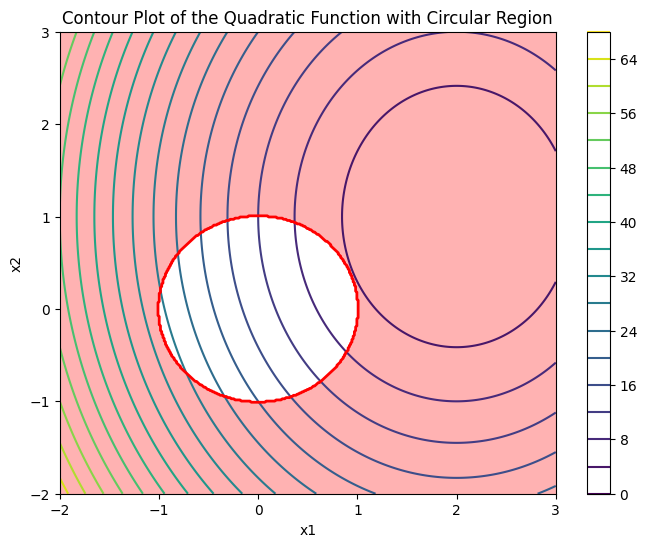

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def quadratic_function(x1, x2):
    return 3*(x1 - 2)**2 + 2*(x2 - 1)**2

# Generate a grid of points
x1 = np.linspace(-2, 3, 400)
x2 = np.linspace(-2, 3, 400)
x1, x2 = np.meshgrid(x1, x2)
y = quadratic_function(x1, x2)

# Define the circular region
circle = x1**2 + x2**2 <= 1

# Plotting the contour of the quadratic function
plt.figure(figsize=(8, 6))
contour = plt.contour(x1, x2, y, levels=20, cmap='viridis')
plt.colorbar(contour)

# Plotting the circular region boundary
circle_contour = plt.contour(x1, x2, circle, levels=[0], colors='red', linewidths=2)

# Highlight the intersection area
plt.contourf(x1, x2, circle, levels=[-1, 0], colors='red', alpha=0.3)

# Labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of the Quadratic Function with Circular Region')

plt.show()


As we move the optimization point using a learning rule towards minimizing $ J(w) $, it crosses the constraint $ ||w||_2^2 \leqslant r $ at the point shown in the above figure. This point represents the optimal value.Compare the two types of Ridge regression (using the L2 norm) and Lasso regression (using the L1 norm) in the following figure.
![Compare L1 & L2](../Regression/RegressionImages/Ridge_Lasso.JPG)

The optimal $\hat{\beta}$ minimizes the objective function $J$. When the optimal contour of $J$ intersects with L1 regularization, it encourages sparsity in $\beta$. In contrast, L2 regularization typically results in smaller values for $\beta$ or shrinks them, without promoting sparsity.

If $ J(w; X, y) $ is not quadratic, we approximate it using quadratic functions.


$\tilde{J}(w; X, y) = \frac{\alpha}{2} w^T w + J(w; X, y),$


$\tilde{J}(w) = \frac{\alpha}{2} w^T w + J(w^*) + \frac{1}{2}(w - w^*)^T H(w - w^*),$

For minimization

$\nabla_w \tilde{J}(w; X, y) = \alpha w + \nabla_w J(w; X, y).$ 

Then

$\nabla_w \tilde{J}(w) = \alpha w + H(w - w^*)$ 


Let $\tilde{w}$ represent the minimizer of the regularized objective function. The slope at this point is equal to zero.

$\nabla_{\tilde{w}} J(\tilde{w}) = 0$

$\alpha \tilde{w} + H(\tilde{w} - w^*) = 0$

$(H + \alpha I)\tilde{w} = Hw^*$

$\tilde{w} = (H + \alpha I)^{-1}Hw^*$. 




In the equation above, if $ H $ is a positive semi-definite, real, and symmetric matrix, it can be decomposed into a diagonal matrix $ \Lambda $ and an orthonormal basis of eigenvectors $ Q $, such that:

$$
 H = Q \Lambda Q^T.
$$

$\nabla_{\tilde{w}} J(\tilde{w}) = 0$

$\alpha \tilde{w} + H(\tilde{w} - w^*) = 0$

$(H + \alpha I)\tilde{w} = Hw^*$

$\tilde{w} = (H + \alpha I)^{-1}Hw^*$. 


$H = Q\Lambda Q^T$. 

$\tilde{w} = (Q\Lambda Q^T + \alpha I)^{-1}Q\Lambda Q^T w^*$

$ = [Q(\Lambda + \alpha I)Q^T]^{-1}Q\Lambda Q^T w^*$

$ = Q(\Lambda + \alpha I)^{-1}\Lambda Q^T w^*$. 



The effect of weight decay is to rescale $w^*$ along the axes defined by the eigenvectors of $H$. The component of $ \tilde{w} $ along the $ i^{th} $ eigenvector of $H$ is rescaled.


$$
\tilde{w}_i = \frac{\lambda_i}{\lambda_i + \alpha}w_i^*
$$

If $\lambda_i >> \alpha$, the effect of regularisation is relatively small. However, components with $\lambda_i << \alpha$ will be shrunk to have nearly zero magnitudes. Only directions along which the parameters contribute significantly to reducing the objective function are preserved relatively intact. In other unimportant parameters, indicated by a small eigenvalue of the Hessian, weight vectors are decayed away through the use of the regularisation throughout the training.

The regularisation constant, $\alpha$ is a hyperparameter and is tuned to get the best results. As the value of $\alpha$ increases, weights are decayed more.

### Regularization from the perspective of smoothness
If smoothness is considered for the regularization function, we follow a function without noise or a smoothed function, as shown below,
![Smmothed Function](../Regression/RegressionImages/f_x.JPG)

The function with the blue color includes more variation and has a higher absolute gradient, while the function with the green color has a smaller absolute gradient. If regularization defined $ \left\| \nabla f \right\|^2 $ and $ f(x) = w^{T}x+b $ so 
$ \left\| \nabla f \right\|^2 = \left\| w \right\|^2$

### Regularization from the perspective of maximum margin
Assuming the farthest points \( x_0 \) and \( x_1 \) from the parallel hyperplanes \( w^{T}x + b = 1 \) and \( w^{T}x + b = -1 \) respectively, the distance between the two hyperplanes is
![Margin](../Regression/RegressionImages/MarginPerspective.jpg)

So, the maximum margin is the largest region that the data can be described by the regressor. From this perspective, minimizing $ ||w|| $ is expected, so we use $ ||w||^2 $.

### Regularization from perspective of Bias-variance
First, let me explain bias-variance. The derivation of the bias–variance decomposition for squared error proceeds as follows. $ y=f(x)+\epsilon $  is the main function that we expect to find. now, 

$$
\begin{align*}
MSE &= E[(y - \hat{f}(x))^2] \\
&= E[(y^{2} -2 y\hat{f}(x) + \hat{f}(x)^{2})] \\
&= E[(y^{2})]-2E[y\hat{f}(x)]+E[(\hat{f}(x)^{2})]\\
\end{align*}
$$

replave $ y $ with $ f(x)+\epsilon $

$$
\begin{align*}
E[(y^{2})]=E[(f+\epsilon)^{2}]
\end{align*}
$$

Because of $ f $ is deterministic, 

$$
\begin{align*}
E[(y^{2})]=f^2+fE[(\epsilon)]+E[\epsilon^{2}]
\end{align*}
$$

We assume that $ \epsilon \sim N(0,\sigma^{2}) $ 

$$
\begin{align*}
E[(y^{2})]=f^2+\sigma^{2}
\end{align*}
$$


Regarding $ \hat{f} $, it is an estimation based on the observation $ y $ for approximating $ f $ , 

$$
\begin{align*}
E[y\hat{f}(x)]\\
&=E[(f(x)+\epsilon)\hat{f}(x)]\\
&=fE[\hat{f}(x)]+E[\epsilon]E[\hat{f}(x)]\\
&=fE[\hat{f}(x)]
\end{align*}
$$

Also

$$
\begin{align*}
E[\hat{f}(x)^{2}]=var(\hat{f}(x))+E[\hat{f}(x)]^{2}
\end{align*}
$$


Finally,

$$
\begin{align*}
MSE &=E[(y^{2})]-2E[y\hat{f}(x)]+E[(\hat{f}(x)^{2})]\\
&=f^2+\sigma^{2}-2fE[\hat{f}(x)]+var(\hat{f}(x))+E[\hat{f}(x)]^{2}\\
&=(f-E[\hat{f}(x)])^{2}+\sigma^{2}+var(\hat{f}(x))
\end{align*}
$$

If the estimator is unbiased, then $ (f-E[\hat{f}(x)])=0 $, In this case Minimum MSE (MMSE) is 

$$
w^{*}=\arg \min_{w}var(\hat{f}(x))
$$

Our discussion was about **regularization** and the bias-variance tradeoff. If $\hat{f} = w^{T}x + b$, then $\mathrm{var}(\hat{f}) = w^{T} \mathrm{cov}(x) w$. Now, if $\mathrm{cov}(x) = I$, then regularization can be expressed as the minimization of mean squared error (MMSE), which is $ w^{T}w $.

## Some loss function for Regression
Another effective approach for reducing the effect of noise in regression models is to use a robust loss function that is less sensitive to outliers. The traditional squared error loss function $ (y - \hat{y})^2 $ is highly sensitive to outliers because the error term is squared, causing large errors to have a disproportionately high impact on the loss. Robust loss functions mitigate this issue by reducing the influence of large errors.

### Robust Loss Functions

#### 1. **Huber Loss**
The Huber loss function combines the properties of squared error loss and absolute error loss. It is less sensitive to outliers in data than the squared error loss. The Huber loss is defined as:

$$
\begin{align*}
    L_\delta(y, \hat{y}) = \begin{cases} 
\frac{1}{2}(y - \hat{y})^2 & \text{for} \ |y - \hat{y}| \leq \delta \\
\delta \left( |y - \hat{y}| - \frac{1}{2}\delta \right) & \text{for} \ |y - \hat{y}| > \delta 
\end{cases} 
\end{align*}
$$

where $\delta$ is a threshold parameter that determines the point where the loss function transitions from quadratic to linear. This makes the Huber loss quadratic for small errors and linear for large errors, reducing the influence of outliers.

#### 2. **Quantile Loss**
Quantile loss is useful in regression tasks where we are interested in predicting a specific quantile of the response variable. The quantile loss function for the $q$th quantile is defined as:

$$
\begin{align*}
 L_q(y, \hat{y}) = \begin{cases} 
q (y - \hat{y}) & \text{if} \ y \geq \hat{y} \\
(1 - q) (\hat{y} - y) & \text{if} \ y < \hat{y} 
\end{cases} 
\end{align*}
$$

This loss function is asymmetric, giving different weights to overestimation and underestimation. It can be particularly effective when the data has skewed distributions or when different types of errors have different costs.

#### 3. **Log-Cosh Loss**
The Log-Cosh loss is another robust loss function that is less sensitive to outliers than the squared error loss. It is defined as:

$$
 L(y, \hat{y}) = \log(\cosh(\hat{y} - y)) 
$$

where $\cosh(x)$ is the hyperbolic cosine function. The Log-Cosh loss behaves similarly to the squared error loss for small differences, but it grows more slowly for large differences, reducing the impact of outliers.

### Example: Using Huber Loss in Regression

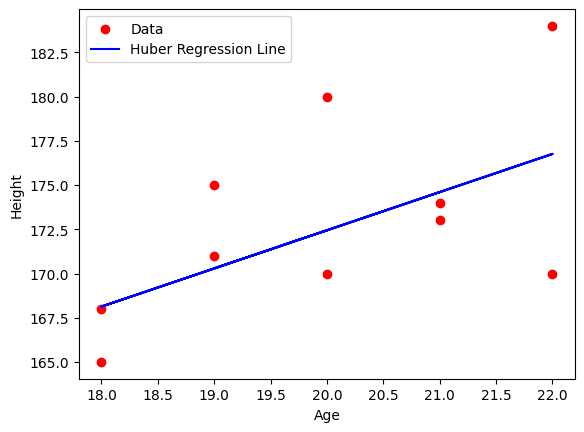

Mean Squared Error: 19.66467222387491


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

# Example data
data = {
    "age": [21, 18, 20, 19, 19, 20, 21, 22, 18, 22],
    "height": [174, 168, 170, 171, 175, 180, 173, 170, 165, 184]
}
df = pd.DataFrame(data)
x = df[['age']]
y = df['height']

# Fit Huber Regressor
huber = HuberRegressor(epsilon=1.35)
huber.fit(x, y)

# Predict and plot results
y_pred = huber.predict(x)

plt.scatter(x, y, color='red', label='Data')
plt.plot(x, y_pred, color='blue', label='Huber Regression Line')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

# Calculate and print Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

### Advantages of Robust Loss Functions
1. **Reduced Sensitivity to Outliers**: By using robust loss functions, models become less sensitive to outliers, which often represent noise in the data.
2. **Better Generalization**: Robust loss functions help in achieving better generalization performance, as they prevent the model from being unduly influenced by a few extreme data points.
3. **Improved Model Performance**: For datasets with noisy measurements or outliers, robust loss functions can lead to better overall model performance and more reliable predictions.

### Working with correntropy loss has improved the robustness of our model against outliers
To replace the Mean Squared Error (MSE) loss function with the correntropy loss in a regression model and solve it analytically, we first need to understand what correntropy is and how it can be used as a loss function.

### Correntropy Loss

Correntropy is a robust similarity measure that combines the concepts of information theory and kernel methods. It is particularly effective for handling non-Gaussian noise and outliers. The correntropy loss for a single prediction can be defined using a Gaussian kernel as follows:

$$
\text{L}(y_i, \hat{y}_i) = \exp \left( -\frac{(y_i - \hat{y}_i)^2}{2\sigma^2} \right) 
$$

where $\sigma$ is a kernel bandwidth parameter that controls the width of the Gaussian kernel.

The overall correntropy loss for a dataset can be written as:

$$
\begin{align*} J(w) = -\frac{1}{n} \sum_{i=1}^{n} \exp \left( -\frac{(y_i - \hat{y}_i)^2}{2\sigma^2} \right) + \lambda \sum_{j=1}^{d} w_j^2 \end{align*}
$$

The first term represents the negative correntropy (since we usually maximize correntropy, but as a loss function, we minimize the negative correntropy), and the second term is the regularization term.

### Analytical Solution for Correntropy Loss

To derive an analytical solution for the weights $ w $ using the correntropy loss, we typically face a challenge since the correntropy loss is non-convex and does not have a closed-form solution like the MSE. Instead, we often rely on iterative optimization techniques. Here, we'll outline a gradient descent approach to minimize the correntropy loss function.

### Gradient Descent Approach

1. **Gradient of Correntropy Loss**:

   The gradient of the correntropy loss with respect to the weights $ w $ can be derived as follows:

   $$
   \begin{align*}
   \frac{\partial J(w)}{\partial w_j} = \frac{1}{n} \sum_{i=1}^{n} \frac{(y_i - \hat{y}_i)}{\sigma^2} \exp \left( -\frac{(y_i - \hat{y}_i)^2}{2\sigma^2} \right) x_{ij} + 2\lambda w_j
   \end{align*}
   $$

   Here, $ x_{ij} $ is the $ j $-th feature of the $ i $-th training example.

2. **Gradient Descent Update Rule**:

   Using gradient descent, we update the weights $ w $ iteratively as follows:

   $$
   \begin{align*}
   w_j^{(t+1)} = w_j^{(t)} - \eta \left( \frac{1}{n} \sum_{i=1}^{n} \frac{(y_i - \hat{y}_i)}{\sigma^2} \exp \left( -\frac{(y_i - \hat{y}_i)^2}{2\sigma^2} \right) x_{ij} + 2\lambda w_j^{(t)} \right)
   \end{align*}
   $$

   Here, $ \eta $ is the learning rate, and $ t $ denotes the iteration index.

### Implementation in Python

Let's implement the gradient descent approach to minimize the correntropy loss function for a simple regression problem.

## HomeWork 
Correct the following code, identify any errors, and explain how to fix them

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {
    "age": [21, 18, 20, 19, 19, 20, 21, 22, 18, 22],
    "height": [174, 168, 170, 171, 175, 180, 173, 170, 165, 184]
}
df = pd.DataFrame(data)
x = df[['age']].values
y = df['height'].values

# Add bias term
x = np.hstack([np.ones((x.shape[0], 1)), x])

# Initialize weights
w = 3*np.random.randn(x.shape[1])

# Parameters
sigma = 2
lambda_reg = 0.1
learning_rate = 1.4
num_iterations = 1000

# Gradient descent
for _ in range(num_iterations):
    y_pred = np.dot(x, w)
    error = y - y_pred
    gradient = -np.dot(x.T, error * np.exp(-error**2 / (2 * sigma**2)) / sigma**2) / len(y) + 2 * lambda_reg * w
    w -= learning_rate * gradient

# Predict and plot results
y_pred = np.dot(x, w)
plt.scatter(df['age'], y, color='red', label='Data')
plt.plot(df['age'], y_pred, color='blue', label='Correntropy Regression Line')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

print(f'Weights: {w}')

## Regression with $\epsilon $-insensitive loss

$$
J(w) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{d} w_j^2
$$


By substituting the square loss with the $ \epsilon $-insensitive loss we have, 

The initial objective function incorporating the $\epsilon$-insensitive loss is:

$$
\frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \max(0, |e_i| - \epsilon)
$$

where $e_i = y_i - \hat{y}_i = y_i - (w^T x_i + b)$.

### Introducing Slack Variables

We introduce slack variables $\xi_i$ to represent the amount by which each error $|e_i|$ exceeds $\epsilon$:

$$
\xi_i = \max(0, |e_i| - \epsilon)
$$

Thus, the objective function can be rewritten as:

$$
\frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

### Constraints

The slack variables $\xi_i$ must satisfy the following constraints:
$ \xi_i\geqslant 0 $
,  

$$
|y_i - (w^T x_i + b)| -\epsilon  \leq  \xi_i
$$

To handle this constraint without using the absolute value, we can split it into two separate constraints:

$$
\begin{cases}
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \\
(w^T x_i + b) - y_i \leq \epsilon + \xi_i
\end{cases}
$$

Additionally, we need to ensure that $\xi_i \geq 0$:

$$
\xi_i \geq 0
$$

### Primal Problem

Combining these constraints with the objective function, we get the primal problem:

$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to:

$$
\begin{cases}
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \\
(w^T x_i + b) - y_i \leq \epsilon + \xi_i \\
\xi_i \geq 0
\end{cases}
$$

### Final Formulation

Thus, the final formulation of the Support Vector Regression (SVR) with $\epsilon$-insensitive loss is:

$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to the constraints:

$$
\begin{cases}
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \\
(w^T x_i + b) - y_i \leq \epsilon + \xi_i \\
\xi_i \geq 0
\end{cases}
$$

We use two slack variables, $\xi_i$ and $\xi_i^*$, instead of one slack variable, $\xi_i$, which can lead to slightly different formulations of the optimization problem.
When we use a single slack variable $\xi_i$, we are simplifying the problem by using one variable to capture deviations from the $\epsilon$-insensitive zone. Here, $\xi_i$ captures the extent to which the prediction $w^T x_i + b$ falls outside the $\epsilon$-tube, both for positive and negative deviations.

### Using Two Slack Variables $\xi_i$ and $\xi_i^*$
Using two slack variables $\xi_i$ and $\xi_i^*$ allows us to separately handle positive and negative deviations outside the $\epsilon$-tube. This formulation is as follows:

#### Objective Function

$$
\min_{w, b, \xi, \xi^*} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)
$$

#### Constraints

$$
\begin{cases}
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \\
(w^T x_i + b) - y_i \leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0
\end{cases}
$$

Here, $\xi_i$ captures the positive deviation  and $\xi_i^*$ captures the negative deviation.

### Differences and Reasons

1. **Flexibility**:
   - **One Slack Variable**: This approach is simpler and assumes that deviations in both directions can be captured using a single variable. It's a straightforward way to enforce the $\epsilon$-insensitive loss.
   - **Two Slack Variables**: This approach provides more flexibility by separately accounting for positive and negative deviations. It allows for different penalization of overestimation and underestimation errors.

2. **Formulation Complexity**:
   - **One Slack Variable**: Leads to a simpler optimization problem with fewer variables and constraints.
   - **Two Slack Variables**: Adds complexity to the optimization problem with more variables and constraints but offers finer control over error handling.

3. **Practical Implications**:
   - In practice, the choice between one or two slack variables depends on the specific requirements of the regression problem. If the errors are expected to be symmetric, one slack variable might suffice. If asymmetric error handling is required, two slack variables might be more appropriate.

This note discusses the use of two slack variables with the selection of coefficients $C_1$ and $C_2$ to better show their effects. The expression can be written as:

$$
C_1 \sum_{i=1}^{n} (\xi_i) + C_2 \sum_{i=1}^{n} (\xi_i)^*
$$
or, in a more optimal form, as:

$$
\sum_{i=1}^{n} c_i (\xi_i + \xi_i^*)
$$

## Some of my papers about **Regression**

1. Vahedian, A., Sadoghi Yazdi, M., Effati, S., & Sadoghi Yazdi, H. (2011). Fuzzy cost support vector regression on the fuzzy samples. *Applied Intelligence, 35*, 428-435.

2. Hajiabadi, H., Monsefi, R., & Sadoghi Yazdi, H. (2019). RELF: Robust regression extended with ensemble loss function. *Applied Intelligence, 49*, 1437-1450.

3. Sadoghi Yazdi, H., Royani, T., Sadoghi Yazdi, M., & Effati, S. (2008). Fuzzy cost support vector regression. *International Journal of Mathematical and Computational Sciences, 2*(8), 587-592.

4. Sadoghi Yazdi, H., Arghiani, M., & Nemati, E. (2011). Nonlinear regression model of a human hand volume: A nondestructive method. *International Journal of Control and Automation, 4*(2), 111-124.

5. Sadoghi Yazdi, H., Sadoghi Yazdi, M., & Vahedian, A. (2010). A new regressor for bandwidth calculation of a rectangular microstrip antenna. *International Journal of Microwave and Optical Technology, 4*(6).

